In [2]:
from collections import defaultdict
import numpy as np

minmax_x = [9999999999999, -9999999999999]
minmax_y = [9999999999999, -9999999999999]

pos_dic = defaultdict(lambda: [])
with open("data/iss/mouse3/ISS_3_spot_table.csv") as f:
    print(f.readline())
    for line in f:
        entries = line.rstrip().split(',')
        x = float(entries[2])
        y = float(entries[3])
        g = entries[1]
        if g == "":
            continue
        pos_dic[g].append([x, y])
        if x < minmax_x[0]:
            minmax_x[0] = x
        if x > minmax_x[1]:
            minmax_x[1] = x
        if y < minmax_y[0]:
            minmax_y[0] = y
        if y > minmax_y[1]:
            minmax_y[1] = y
for g in pos_dic:
    pos_dic[g] = np.array(pos_dic[g])

,gene,x_um,y_um



In [3]:
all_genes = sorted(pos_dic.keys())
mrna_loci = [pos_dic[gene] for gene in all_genes]

In [4]:
minmax_x, minmax_y

([12.025, 3345.875], [3.7375, 3940.3])

In [5]:
width, height = 3346, 3941

In [6]:
import ssam

In [7]:
ds = ssam.SSAMDataset(all_genes, mrna_loci, width, height)
analysis = ssam.SSAMAnalysis(ds, ncores=10, save_dir="data/iss_mouse3", verbose=True)

In [8]:
analysis.run_fast_kde(bandwidth=2.5, use_mmap=False)

Processing gene 3110035E14Rik...
Processing gene Adarb2...
Processing gene Alcam...
Processing gene Adcy2...
Processing gene Ank1...
Processing gene Ankrd55...
Processing gene Arx...
Processing gene Arpp19...
Processing gene Bdnf...
Processing gene Atp1a3...
Processing gene Brinp3...
Processing gene Btbd11...
Processing gene Cacna2d3...
Processing gene Calb1...
Processing gene Caln1...
Processing gene Camk2n1...
Processing gene Car3...
Processing gene Car4...
Processing gene Cck...
Processing gene Cd34...
Processing gene Cdh13...
Processing gene Cdh9...
Processing gene Chodl...
Processing gene Chrna2...
Processing gene Cnr1...
Processing gene Cplx3...
Processing gene Cpne7...
Processing gene Crh...
Processing gene Cryab...
Processing gene Crym...
Processing gene Ctxn1...
Processing gene Cxcl14...
Processing gene Dcn...
Processing gene Deptor...
Processing gene Dgkb...
Processing gene Dlx1...
Processing gene Dlx6os1...
Processing gene Etv1...
Processing gene Fa2h...
Processing gene Fam1

In [9]:
import pickle
with open("scrna_sigs.pkl", "rb") as f:
    scrna_clusters, scrna_genes, scrna_full_centroids, scrna_colors = pickle.load(f)

In [10]:
gene_conv_dic ={
    "Ngfrap1": "Bex3",
    "Gucy1a3": "Gucy1a1",
    "Ppap2b": "Plpp3",
    "Selm": "Selenom",
    #"3110035E14Rik": "Vxn",
    "Plpp4": "Ppapdc1a",
    #"Fam84b": "Lratd2"
}

In [11]:
for f, t in gene_conv_dic.items():
    scrna_genes = np.where(scrna_genes == f, t, scrna_genes)

In [12]:
selected_genes_idx = [list(scrna_genes).index(g) for g in ds.genes]
scrna_uniq_clusters = np.unique(scrna_clusters)
scrna_centroids = scrna_full_centroids[:, selected_genes_idx]

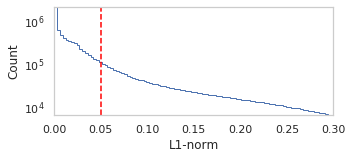

In [21]:
import matplotlib.pyplot as plt
norm_thres = 0.05
gidx = 0
plt.figure(figsize=[5, 2])
#plt.hist(ds.vf[..., gidx][ds.vf[..., gidx] > 0], bins=100, log=True)
n, _, _ = plt.hist(ds.vf_norm[np.logical_and(ds.vf_norm > 0, ds.vf_norm < 0.3)], bins=100, log=True, histtype='step')
ax = plt.gca()
ax.axvline(norm_thres, c='red', ls='--')
ax.set_xlabel("L1-norm")
ax.set_ylabel("Count")

plt.xlim([0, 0.3])
plt.ylim([np.min(n), np.max(n) + 100000])
pass

In [15]:
analysis.map_celltypes(scrna_centroids)

In [16]:
analysis.filter_celltypemaps(min_norm=0.02, min_r=0.3)

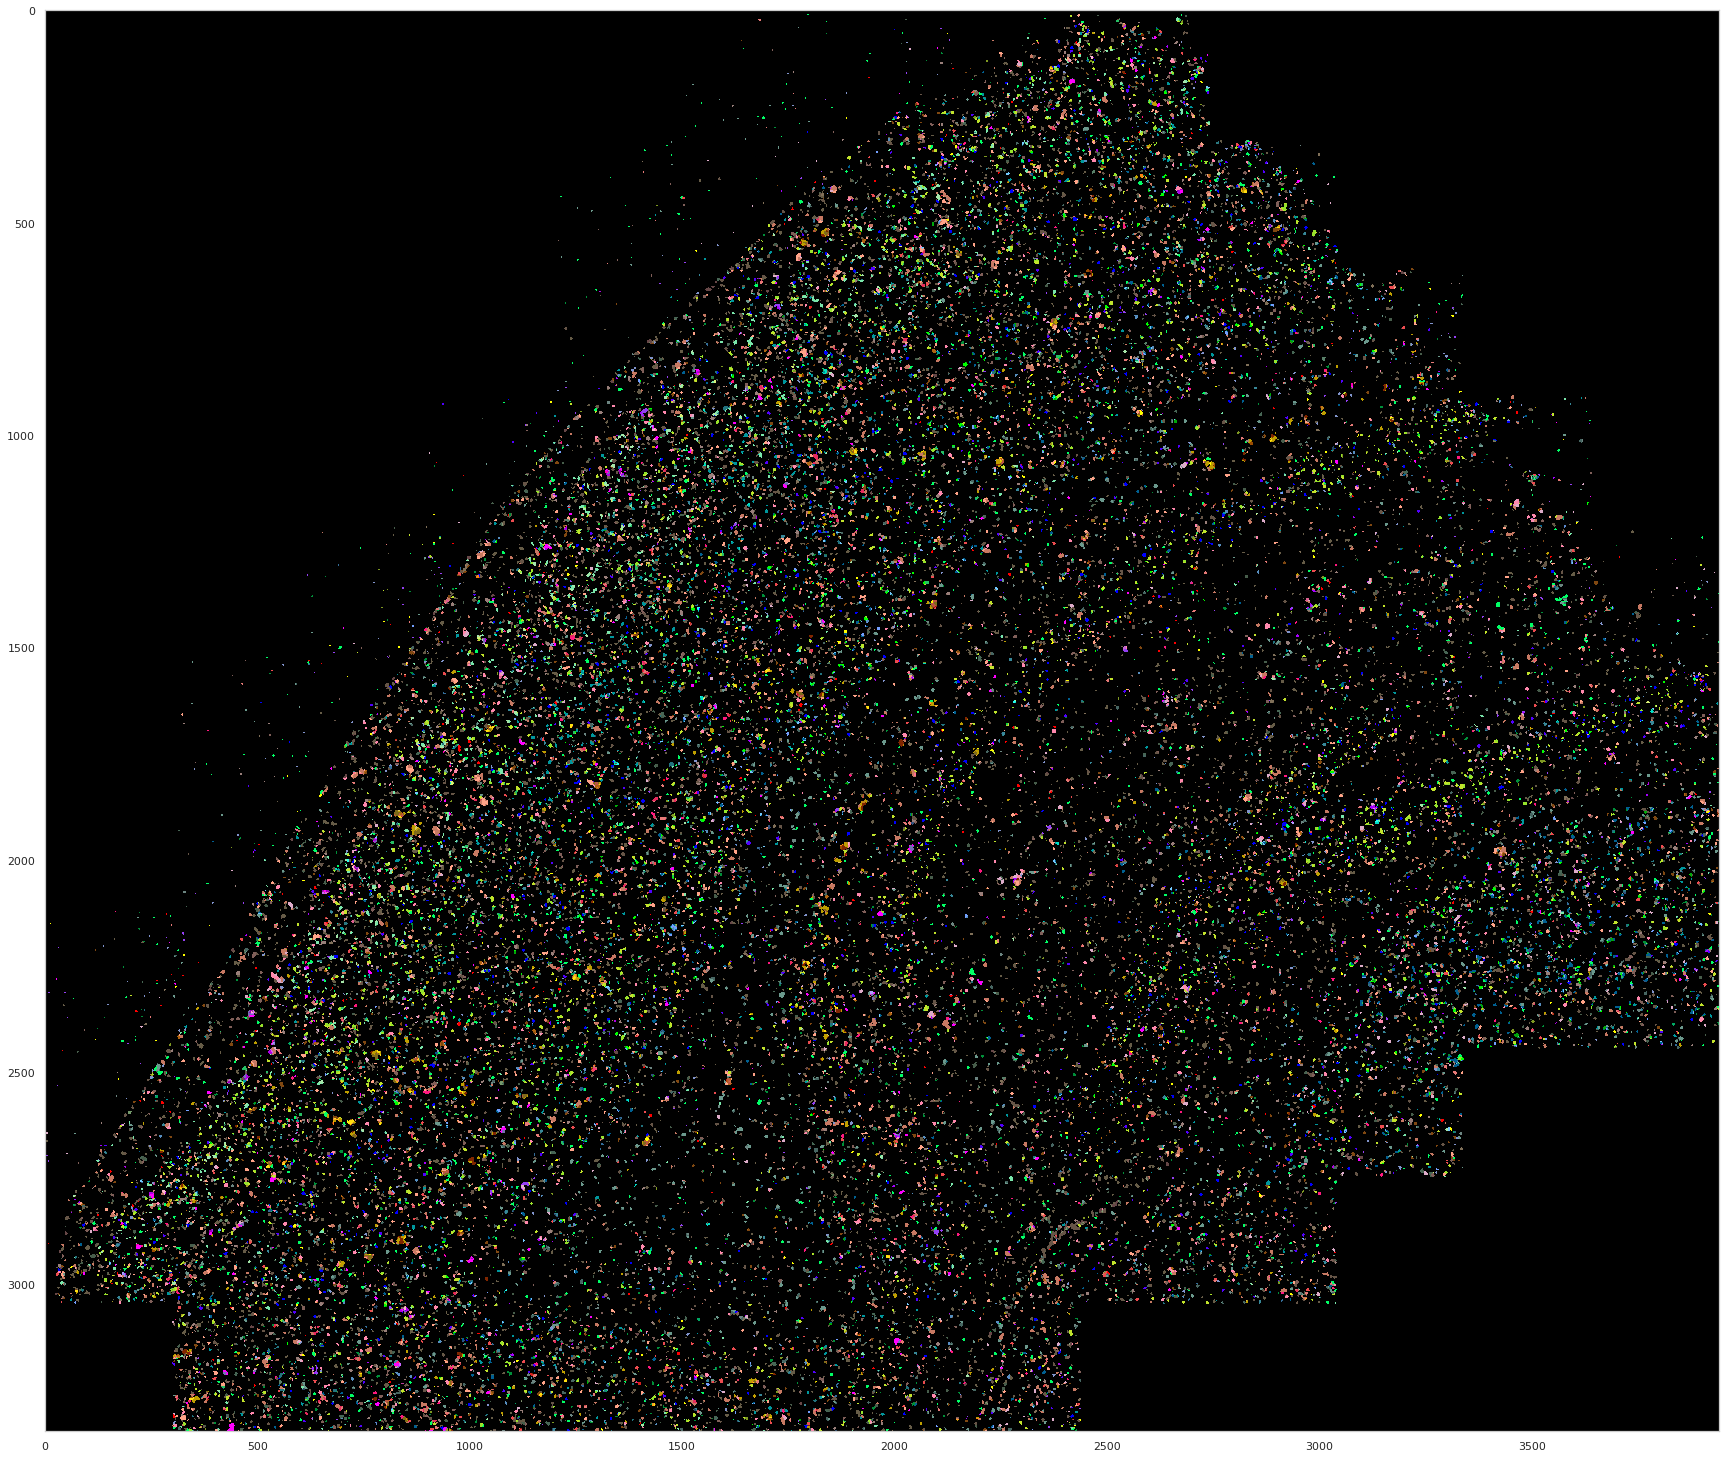

In [17]:
import matplotlib.pyplot as plt
plt.figure(figsize=[30,30])
_ = ds.plot_celltypes_map(rotate=0, colors=scrna_colors)

(3000, 2000)

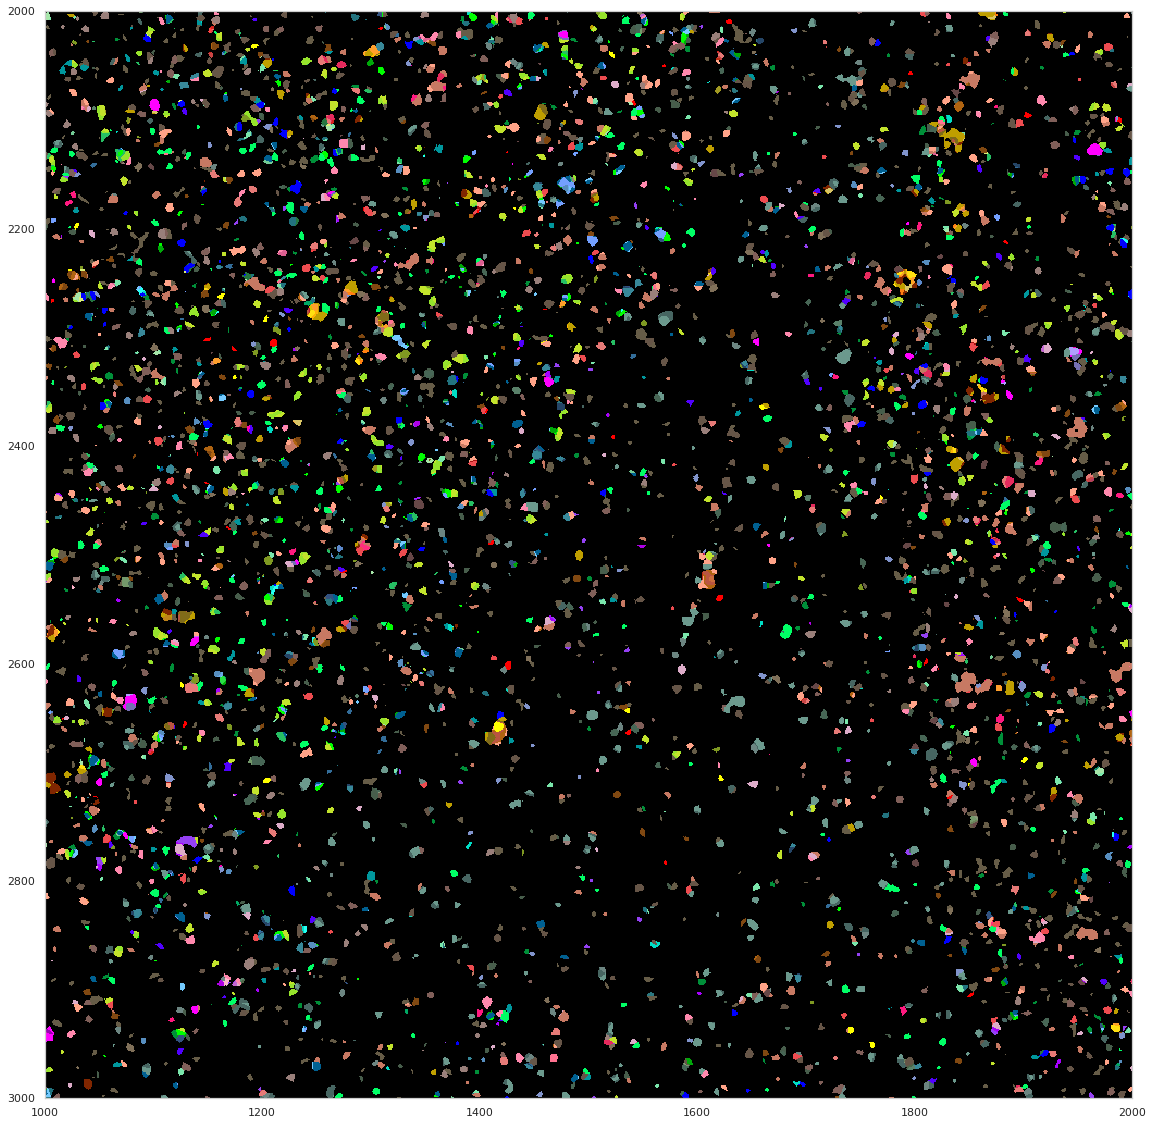

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,20])
_ = ds.plot_celltypes_map(rotate=0, colors=scrna_colors)
plt.xlim([1000, 2000])
plt.ylim([3000, 2000])

(3000, 2000)

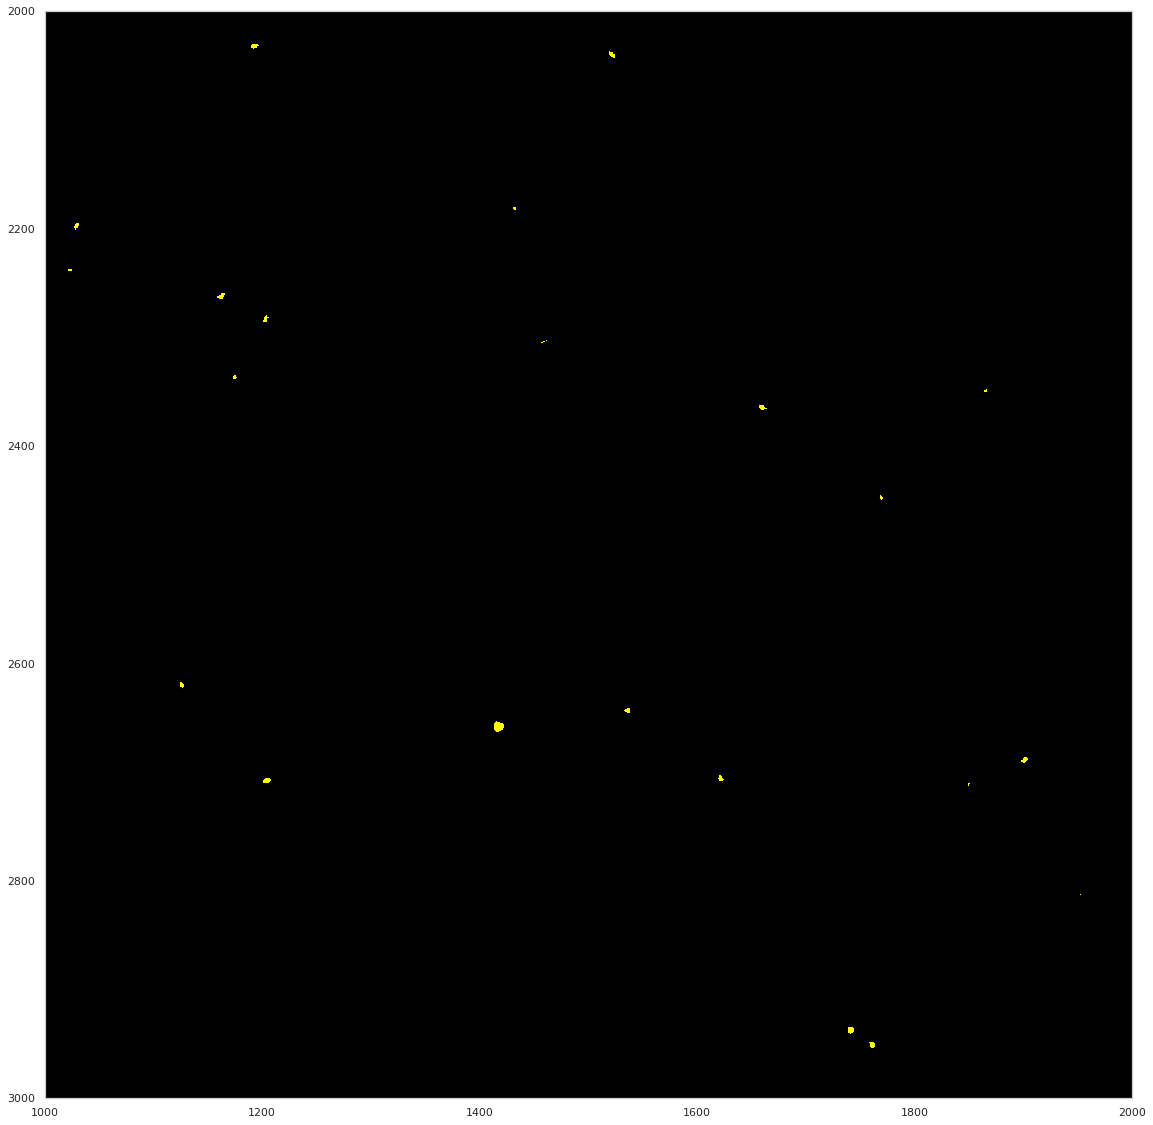

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,20])
_ = ds.plot_celltypes_map(rotate=0, colors=scrna_colors, centroid_indices=[29])
plt.xlim([1000, 2000])
plt.ylim([3000, 2000])

(3000, 2000)

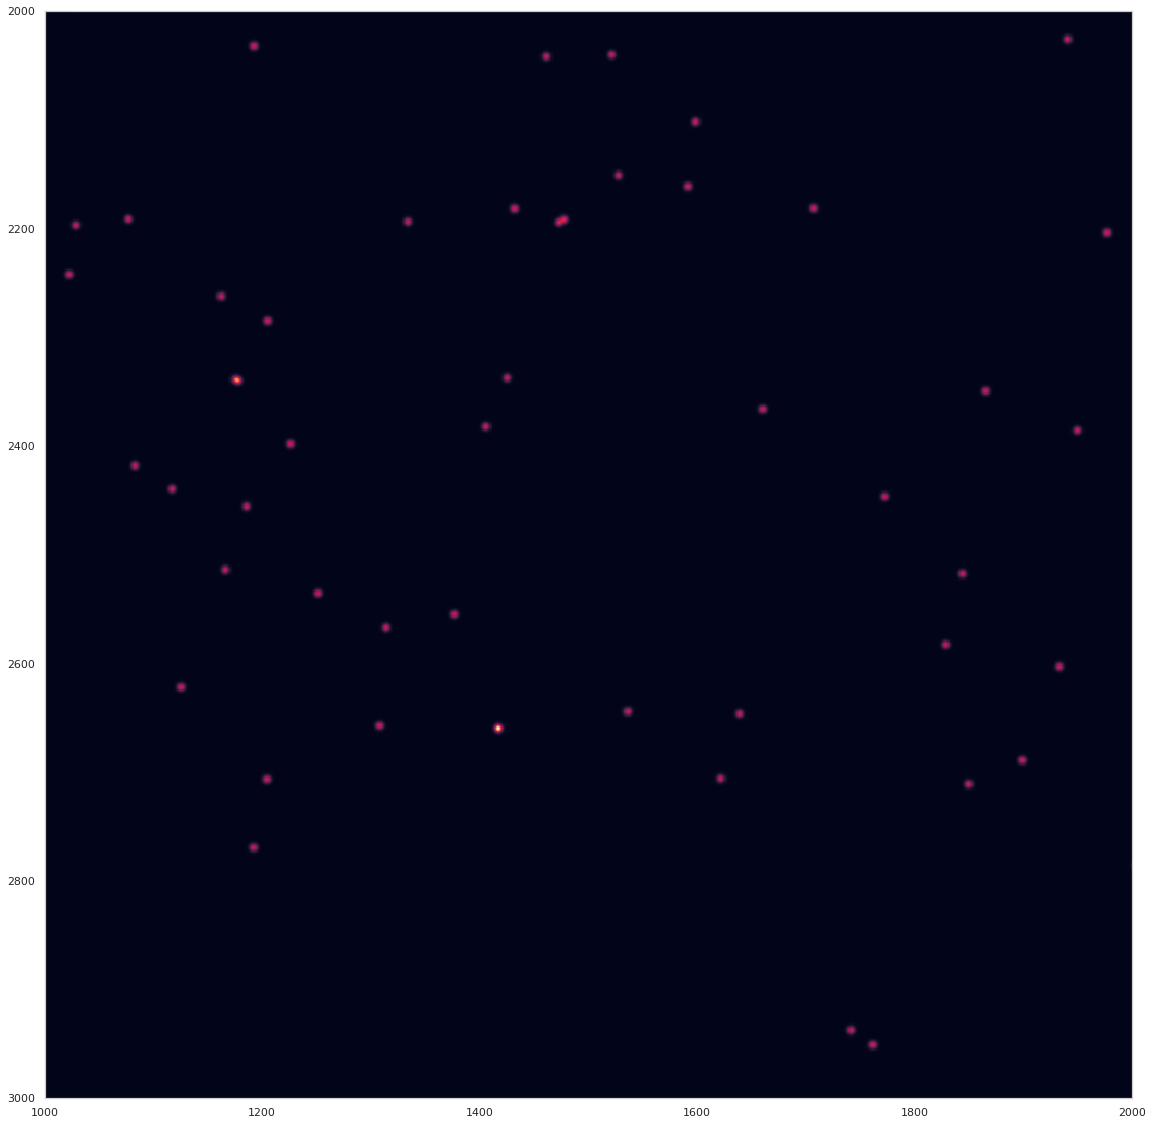

In [20]:
import matplotlib.pyplot as plt
plt.figure(figsize=[20,20])
plt.imshow(ds.vf[..., 0, ds.genes.index("Chodl")])
plt.xlim([1000, 2000])
plt.ylim([3000, 2000])

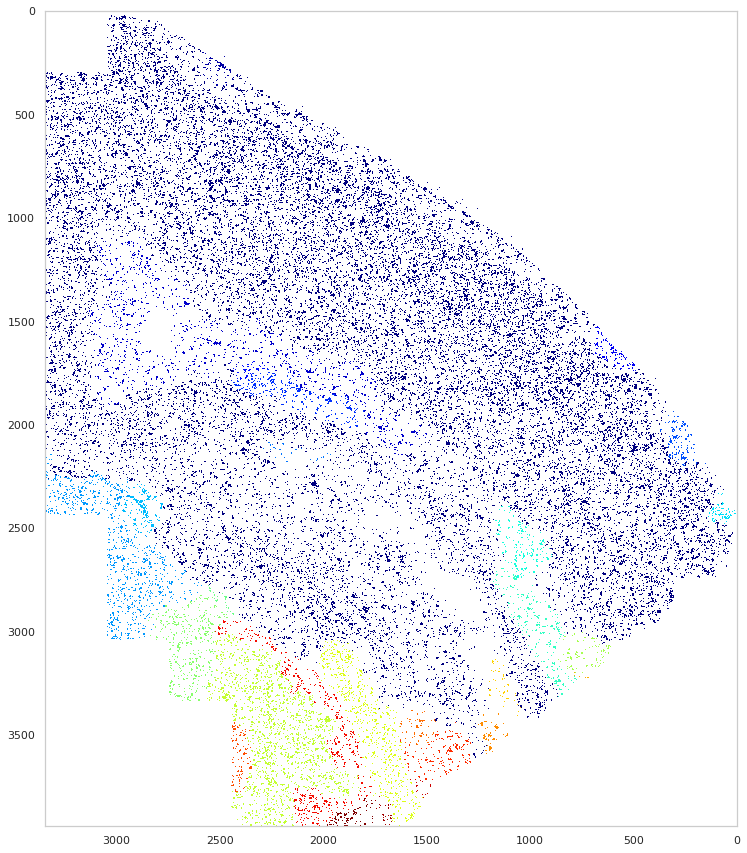

In [23]:
analysis.bin_celltypemaps(step=10, radius=100)
analysis.find_domains(n_clusters=20, merge_remote=False, merge_thres=0.9, norm_thres=1500)
plt.figure(figsize=[15, 15])
ds.plot_domains(rotate=1)